# Выборка и агрегация данных в MongoDB

###Цель домашней работы

Закрепить на практике основные приемы работы с СУБД MongoDB, включая выборку, сортировку, объединение, агрегацию данных и передачу результатов выборки в программу на Python в целях аналитики и дальнейшей обработки.

### Формулировка задания

В этом задании вам предстоит выполнить несколько запросов к базе данных для получения выборок по условиям, а также воспользоваться фреймворком агрегации MongoDB для построения конвейера обработки данных.

Максимальное количество баллов за выполнение домашней работы: 10.

##Что нужно использовать в работе над заданием

I. MongoDB:

1. Зарегистрируйтесь в сервисе MongoDB Atlas: https://www.mongodb.com/atlas/database.
1. Создайте кластер уровня M0 (это бесплатно).
1. Добавьте в кластер тестовую базу данных `sample_mflix`, используя опцию Load Sample Dataset.

В качестве альтернативы вы можете установить MongoDB на свой локальный компьютер и импортировать необходимые датасеты в свою СУБД, загрузив их по ссылке: https://github.com/neelabalan/mongodb-sample-dataset/tree/main/sample_mflix. Для этого подключитесь к своему серверу через Compass, создайте новую БД, создайте для каждого датасета коллекцию и щелкните «Add data» → «Import JSON or CSV file».

II. MongoDB Compass — в качестве вспомогательного инструмента для конструирования запросов и агрегаций.

III. Python и библиотека pymongo. Работа ведется в Jupyter Notebook или Google Colaboratory. Рекомендуется использовать версию Python 3.12.

##Ожидаемые результаты

Результаты работы необходимо оформить в виде ноутбука Jupyter. Можно загрузить файл в LMS либо поделиться ссылкой на Google Colaboratory.

##Место где нужно выполнить задание



In [ ]:
#Начать выполнение задания тут

In [1]:
# !pip install pymongo

import pymongo

client = pymongo.MongoClient("mongodb://localhost")
print(client.list_database_names())  # Вывести список БД для проверки подключения

['SeriesDB', 'admin', 'config', 'dz', 'local']


### Упражнение 1. Запросы на выборку

Цель этого упражнения — закрепить навык выполнения запросов на выборку. Все запросы выполняются на базе `sample_mflix` с данными о кинофильмах.

#### Задача 1.1 — **1 балл**

Выведите из коллекции `theaters` документы о кинотеатрах в городе Florence, штат KY.

Для справки:

* Обратите внимание на то, что информация об адресе кинотеатров хранится во вложенных документах. Для доступа к полям вложенных документов следует использовать точку: `родительский_документ.вложенный_документ.поле`.
* В случае затруднений с написанием логического условия обращайтесь к сопоставлению синтаксиса SQL и Mongo: https://www.mongodb.com/docs/manual/reference/sql-comparison/.
* Если вы предпочитаете сперва выполнять запросы в Compass, из этого приложения можно выгружать код готового запроса на Python (кнопка с символом `</>`).

In [2]:
# Ваш код здесь
db = client.dz
list(db.theaters.find( { 'location.address.city': "Florence", 'location.address.state': "KY" } ))

[{'_id': ObjectId('59a47287cfa9a3a73e51e893'),
  'theaterId': 161,
  'location': {'address': {'street1': '100 Meijer Dr.',
    'city': 'Florence',
    'state': 'KY',
    'zipcode': '41042'},
   'geo': {'type': 'Point', 'coordinates': [-84.636383, 39.014843]}}},
 {'_id': ObjectId('59a47287cfa9a3a73e51ea02'),
  'theaterId': 2823,
  'location': {'address': {'street1': '2823 Florence Mall',
    'street2': '#2148',
    'city': 'Florence',
    'state': 'KY',
    'zipcode': '41042'},
   'geo': {'type': 'Point', 'coordinates': [-84.6499595, 38.9967246]}}}]

#### Задача 1.2 — **1 балл**

Сделав запрос к коллекции `comments`, выведите _один_ комментарий (значение поля `text`) пользователя по имени Doreah.

In [3]:
# Ваш код здесь
db.comments.find_one( { 'name': "Doreah"} )

{'_id': ObjectId('5a9427648b0beebeb6957b18'),
 'name': 'Doreah',
 'email': 'roxanne_mckee@gameofthron.es',
 'movie_id': ObjectId('573a1391f29313caabcd7915'),
 'text': 'Porro explicabo cumque vitae sint quia quis. Consequuntur voluptatibus optio maxime ratione temporibus incidunt minus architecto.',
 'date': datetime.datetime(1983, 9, 13, 3, 38, 23)}

#### Задача 1.3 — **1 балл**

Сделав запрос к коллекции `movies`, выведите количество документов, в которых в качестве первого жанра фильма (поле `genres`) указано значение «Horror».

Для справки:

1. Обратите внимание, что поле `genres` представляет собой массив (индексация массивов начинается с нуля).
1. При работе в MongoDB Shell для подсчета количества документов в курсоре можно использовать метод `count()`, однако он был удален в последних версиях библиотеки pymongo. В случае затруднений с использованием функций Mongo можно использовать для подсчета документов средства Python.

In [4]:
# Ваш код здесь
# len(list(db.movies.find({'genres.0': 'Horror'} )))
db.movies.count_documents({'genres.0': 'Horror'})

814

#### Задача 1.4 — **2 балла**

Выведите из коллекции `movies` документы о фильмах, которые в качестве первого жанра определены как «Film-Noir» либо «Horror» и были выпущены в период с 1940 по 1949 гг. (включительно).

In [5]:
# Ваш код здесь
list(db.movies.find( {'$or' : [{'genres.0': "Film-Noir"}, {'genres.0': 'Film-Noir'}], 'year': {'$lt': 1949, '$gt': 1940} } ))

[{'_id': ObjectId('573a1393f29313caabcdd5bc'),
  'plot': 'A psychiatrist protects the identity of an amnesia patient accused of murder while attempting to recover his memory.',
  'genres': ['Film-Noir', 'Mystery', 'Romance'],
  'runtime': 111,
  'rated': 'UNRATED',
  'cast': ['Ingrid Bergman',
   'Gregory Peck',
   'Michael Chekhov',
   'Leo G. Carroll'],
  'num_mflix_comments': 2,
  'poster': 'https://m.media-amazon.com/images/M/MV5BMTM2NDI5Nzg5Nl5BMl5BanBnXkFtZTcwNDk3NzI0NA@@._V1_SY1000_SX677_AL_.jpg',
  'title': 'Spellbound',
  'fullplot': 'The head of the Green Manors mental asylum Dr. Murchison is retiring to be replaced by Dr. Edwardes, a famous psychiatrist. Edwardes arrives and is immediately attracted to the beautiful but cold Dr. Constance Petersen. However, it soon becomes apparent that Dr. Edwardes is in fact a paranoid amnesiac impostor. He goes on the run with Constance who tries to help his condition and solve the mystery of what happened to the real Dr. Edwardes.',
  'l

#### Задача 1.5 — **1 балл**

Модифицируйте запрос из задачи 1.4 таким образом, чтобы осуществить _проекцию_: результатом выборки должен стать список словарей, каждый из которых содержит только два поля: `title` и `year`.

Для справки о проекции см. документацию по методу `find()` в pymongo:
https://pymongo.readthedocs.io/en/stable/api/pymongo/collection.html#pymongo.collection.Collection.find

In [6]:
# Ваш код здесь
list(db.movies.find( {'$or' : [{'genres.0': "Film-Noir"}, {'genres.0': 'Film-Noir'}], 'year': {'$lt': 1949, '$gt': 1940} }, projection=['title', 'year']  ))

[{'_id': ObjectId('573a1393f29313caabcdd5bc'),
  'title': 'Spellbound',
  'year': 1945},
 {'_id': ObjectId('573a1393f29313caabcdd6e7'),
  'title': 'The Chase',
  'year': 1946}]

### Упражнение 2. Конвейер агрегации

#### Задача 2.1 — **3 балла**

В рамках этой задачи требуется узнать, какие фильмы получили наибольшее число комментариев. Составьте для этого конвейер агрегации с перечисленными ниже этапами. Для удобства рекомендуется воспользоваться приложением Compass.

1. Сгруппировать документы коллекции `comments` по полю `movie_id` и подсчитать количество комментариев для каждого фильма, записав его в поле `count`.
1. Отсортировать получившийся набор данных по убыванию количества комментариев (так чтобы первый документ в этом наборе указывал на фильм с наибольшим количеством комментариев).
1. Используя оператор `$lookup`, присоединить коллекцию `movies` (по полю `movie_id`).
1. Выполнить проекцию, оставив в наборе данных только три поля: название фильма (`title`), год выпуска (`year`) и количество комментариев (поле `count`, добавленное на первом этапе). Для этого воспользуйтесь оператором `$project`: https://www.mongodb.com/docs/manual/reference/operator/aggregation/project/. Обратите внимание, что данные из коллекции `movies` (`title` и `year`) на этом этапе окажутся внутри массива.
1. Применить оператор `$unwind`, чтобы деконструировать этот массив. См. https://www.mongodb.com/docs/manual/reference/operator/aggregation/unwind/. В результате массив должен превратиться в одиночный объект.
1. Применить оператор `$addFields`, чтобы добавить поля `title` и `year` на вернхий уровень структуры документа. См. https://www.mongodb.com/docs/manual/reference/operator/aggregation/addFields/.
1. Еще раз выполнить проекцию, чтобы удалить поле с массивом.

Ваш алгоритм решения может отличаться от приведенного здесь. Главное — достичь цели: получить плоский набор данных с тремя полями (`count` — количество комментариев, `year` — год выпуска, `title` — название фильма).

Скопируйте полученный конвейер в этот документ в виде кода на Python и выведите его на экран в виде списка словарей.

In [7]:
# Ваш код здесь
# from bson.son import SON

result = list(db.comments.aggregate( [
    {"$group": {"_id": "$movie_id", "count": {"$sum": 1}}},
    {"$sort": {"count": -1}}, #SON([("count", -1), ("_id", -1)])
    {
    "$lookup": {
      "from": "movies",
      "localField": "_id",
      "foreignField": "_id",
      "as": "movie_details",
    },
  },
   {"$project": {  "_id": 0, "count": 1, "movie_details.title": 1, "movie_details.year": 1 }},
   {"$unwind": "$movie_details"},
   {"$addFields": { "title": "$movie_details.title", "year": "$movie_details.year" }},
   {"$project": { "title": 1, "year": 1, "count": 1 }}
]))

result

[{'count': 161, 'title': 'The Taking of Pelham 1 2 3', 'year': 2009},
 {'count': 158, 'title': 'Terminator Salvation', 'year': 2009},
 {'count': 158, 'title': 'About a Boy', 'year': 2002},
 {'count': 158, 'title': "Ocean's Eleven", 'year': 2001},
 {'count': 158, 'title': '50 First Dates', 'year': 2004},
 {'count': 157, 'title': 'The Mummy', 'year': 1999},
 {'count': 157, 'title': 'Sherlock Holmes', 'year': 2009},
 {'count': 155, 'title': 'Hellboy II: The Golden Army', 'year': 2008},
 {'count': 154, 'title': 'The Mummy Returns', 'year': 2001},
 {'count': 154,
  'title': 'Anchorman: The Legend of Ron Burgundy',
  'year': 2004},
 {'count': 153, 'title': 'Bruce Almighty', 'year': 2003},
 {'count': 153, 'title': 'X-Men', 'year': 2000},
 {'count': 153,
  'title': "Pirates of the Caribbean: At World's End",
  'year': 2007},
 {'count': 153, 'title': 'E.T. the Extra-Terrestrial', 'year': 1982},
 {'count': 153, 'title': 'Cinderella', 'year': 1950},
 {'count': 153, 'title': 'Mission: Impossible',

#### Задача 2.2 — **1 балл**

Используя данные, полученные в задаче 2.1, выведите на экран столбчатую диаграмму, показывающую топ-20 наиболее комментируемых фильмов. По оси ординат выведите названия этих фильмов (подписи разместите слева диаграммы), по оси абсцисс — количество комментариев.

Для решения задачи можно использовать любую библиотеку, например Seaborn или Matplotlib.

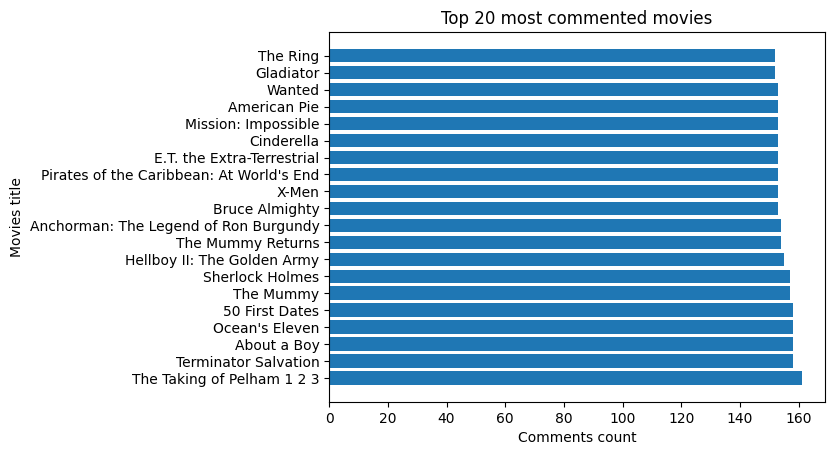

In [8]:
# Ваш код здесь
import matplotlib.pyplot as plt

groups = [x['title'] for x in result[:20]]
counts = [x['count'] for x in result[:20]]
plt.barh(groups, counts)
plt.xlabel('Comments count')
plt.ylabel('Movies title')
plt.title('Top 20 most commented movies')
plt.show()